### Initial exploratory data analysis

Usually for data analysis I use Python. But I have selected R to perform EDA for it powerful visualization tools. Especialy ggplot, which is have port to Python, but documentation is poor and features are limited.

First, I wanted to see a split of cases by type. At the moment I decided to choose one color scheme for cases types to use it in all further plots. Here http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=3 I have chosen dark color scheme with 3 distinctive colors: #d95f02 for robbery, #1b9e77 for theft, #7570b3 for fraud. Roberies have the smallest share overall cases, but they are more important as they indicate much more serious criminal problems. Therefore I have chosen a noticeable orange color for robberies.

In [6]:
library(ggplot2)
Sys.setlocale("LC_CTYPE", "ukrainian")

criminal = read.csv("criminal.csv", encoding="UTF-8")
head(criminal)

[1] "Ukrainian_Ukraine.1251"

Будинок,Вулиця,Дата.час,Орган,Тип,Час,Latitude,Longitude,Час..секунди
11А,22 січня (Рудно),13.09.2015 17:05,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ ОБЛАСТІ,Крадіжка,17:05:00,49.83410,23.88709,61500
7,Авіаційна,23.12.2015 10:02,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ ОБЛАСТІ,Крадіжка,10:02:00,49.81093,23.93180,36120
,Авіаційна,05.12.2015 13:20,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ ОБЛАСТІ,Крадіжка,13:20:00,49.81252,23.92972,48000
1,Авіаційна,30.11.2015 19:30,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ ОБЛАСТІ,Крадіжка,19:30:00,49.81684,23.92693,70200
,Авіаційна,27.11.2015 11:00,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ ОБЛАСТІ,Крадіжка,11:00:00,49.81252,23.92972,39600
2,Авіаційна,01.11.2015 11:53,ЗАЛІЗНИЧНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП У ЛЬВІВСЬКІЙ ОБЛАСТІ,Крадіжка,11:53:00,49.82073,23.93509,42780


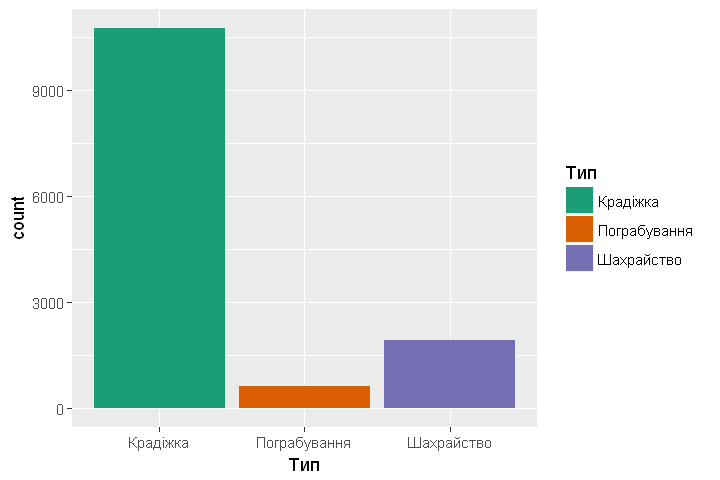

In [2]:
options(repr.plot.width=6, repr.plot.height=4)
pl <- ggplot(criminal, aes_string(x='Тип', fill='Тип')) + 
    geom_bar() + 
    scale_fill_manual(values=c("#1b9e77", "#d95f02", "#7570b3"))
pl

Seems to be a good idea for a next step to analyze daily criminal activity and detect the most dangerous time.

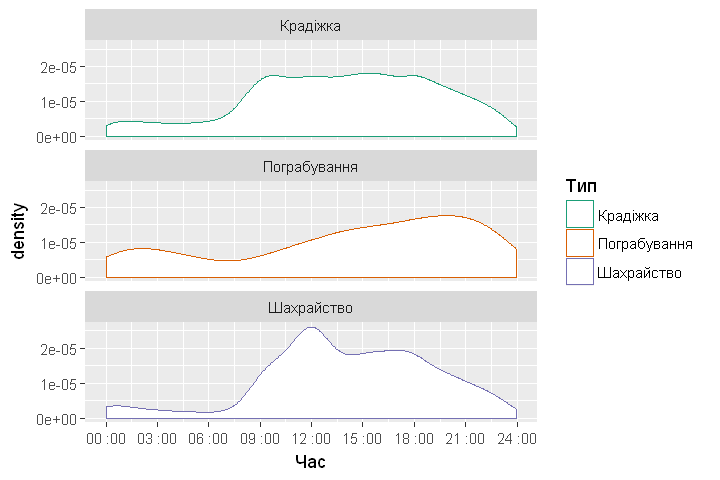

In [3]:
hours_label <- function(seconds) {
    hour <- floor(seconds / 3600)
    return(paste(sprintf("%02d", hour), ":00"))
}
              
ggplot(criminal, aes_string(x='Час..секунди', color='Тип', fill='Тип')) + 
    geom_density() + 
    facet_wrap(as.formula(paste("~", "Тип")), ncol=1) + 
    scale_color_manual(values=c("#1b9e77", "#d95f02", "#7570b3")) + 
    scale_fill_manual(values=c("#ffffff", "#ffffff", "#ffffff")) + 
    scale_x_continuous(breaks = seq(0,3600*24, 3*3600), labels=hours_label, name='Час')